In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
import pandas as pd
from pymongo import MongoClient

# Menghubungkan ke server MongoDB (secara lokal)
client = MongoClient('localhost', 27017)
db = client['google_play_store_data']
collection = db['04. label_data_bibit'] 

# Mengambil semua dokumen dalam koleksi
cursor = collection.find()

# Mengonversi data ke dalam bentuk DataFrame
df = pd.DataFrame(list(cursor))

# Menutup koneksi dengan server MongoDB
client.close()

df


,_id,at,tokenized_content,filtered_content,data_clean,label
0,6638614cdd520c9ba22ee66c,2024-05-05 10:54:32,"[mau, daftar, saja, di, persulit, dari, bulan,...","[daftar, persulit, april, gagal, melulu, dafta...",daftar sulit april gagal melulu daftar foto kt...,1.0
1,6638614cdd520c9ba22ee66d,2024-05-03 17:16:43,"[aku, ngerasa, ini, aplikasi, sepertinya, pals...","[ngerasa, aplikasi, palsu, binomo, turun, dras...",ngerasa aplikasi palsu binomo turun drastis ri...,NaN
2,6638614cdd520c9ba22ee66e,2024-05-03 09:09:22,"[maaf, sebelumnya, saya, kasih, tau, jangan, i...","[maaf, kasih, investasi, bibit, pencairan, sal...",maaf kasih investasi bibit cair saldo masuk mi...,1.0
3,6638614cdd520c9ba22ee66f,2024-05-03 07:50:00,"[sampah, sudah, jual, di, harga, tingi, tapi, ...","[sampah, jual, harga, tingi, verifikasi, penju...",sampah jual harga tingi verifikasi jual harga ...,NaN
4,6638614cdd520c9ba22ee670,2024-05-02 11:55:53,"[pencairan, ribu, saja, seperti, jt, maksimal,...","[pencairan, ribu, jt, maksimal, kerja, lawak]",cair ribu jt maksimal kerja lawak,NaN
...,...,...,...,...,...,...
8230,663864e9dd520c9ba22f284a,2021-06-12 08:12:17,"[aku, suka, ini, aplikasi, next, adain, beli, ...","[suka, aplikasi, next, adain, beli, emas, dola...",suka aplikasi next adain beli emas dolar index...,NaN
8231,663864e9dd520c9ba22f284b,2020-12-31 17:43:10,"[aplikasi, yang, banyak, manfatnya, terutama, ...","[aplikasi, manfatnya, khilaf, belanja, keuanga...",aplikasi manfatnya khilaf belanja uang rencana...,NaN
8232,663864e9dd520c9ba22f284c,2021-04-06 22:11:23,"[salah, satu, aplikasi, aperd, yang, layak, di...","[salah, aplikasi, aperd, layak, dintal, berinv...",salah aplikasi aperd layak dintal investasi fi...,NaN
8233,663864e9dd520c9ba22f284d,2023-01-01 15:18:20,"[saat, daftar, masukan, kode, referal, farelto...","[daftar, masukan, kode, referal, fareltolemba,...",daftar masuk kode referal fareltolemba langsun...,NaN


In [3]:
# pemisahan data training dan data testing
train_data = df[df["label"].notnull()]  # Data training
test_data = df[df["label"].isnull()]    # Data testing

In [4]:
train_data

,_id,at,tokenized_content,filtered_content,data_clean,label
0,6638614cdd520c9ba22ee66c,2024-05-05 10:54:32,"[mau, daftar, saja, di, persulit, dari, bulan,...","[daftar, persulit, april, gagal, melulu, dafta...",daftar sulit april gagal melulu daftar foto kt...,1.0
2,6638614cdd520c9ba22ee66e,2024-05-03 09:09:22,"[maaf, sebelumnya, saya, kasih, tau, jangan, i...","[maaf, kasih, investasi, bibit, pencairan, sal...",maaf kasih investasi bibit cair saldo masuk mi...,1.0
5,6638614cdd520c9ba22ee671,2024-05-01 21:24:09,"[ribet, cara, mengunakan, nya]","[ribet, mengunakan]",ribet mengunakan,1.0
7,6638614cdd520c9ba22ee673,2024-04-30 22:53:27,"[verifikasi, sudah, hampir, seminggu, tidak, d...","[verifikasi, seminggu, ac, ac, kecewa]",verifikasi minggu ac ac kecewa,1.0
8,6638614cdd520c9ba22ee674,2024-04-30 19:27:01,"[kenapa, harus, menggunakan, bank, jago, mau, ...","[bank, jago, akun, susah]",bank jago akun susah,1.0
...,...,...,...,...,...,...
5877,6638645bdd520c9ba22f1e9a,2021-03-07 15:34:53,"[mantap, menggunakan, kode, referal, ini, buat...","[mantap, kode, referal, daftar, lilahi]",mantap kode referal daftar lilah,2.0
5884,6638645bdd520c9ba22f1ea3,2021-03-01 14:44:04,"[aplikasi, nya, bagus, tapi, aku, saranin, tam...","[aplikasi, bagus, saranin, tambahin, pembayara...",aplikasi bagus saranin tambahin bayar dana ovo...,2.0
5887,6638645bdd520c9ba22f1eaa,2021-02-26 19:27:22,"[keseluruhan, bagus, sederhana, sangat, jadi, ...","[bagus, sederhana, mudah, dipahami, pemula, sa...",bagus sederhana mudah paham mula saran coba bi...,2.0
5900,6638645bdd520c9ba22f1ebf,2021-02-16 07:08:58,"[untuk, aplikasi, sudah, bagus, tapi, untuk, p...","[aplikasi, bagus, pencairan, dana, menungu, da...",aplikasi bagus cair dana tungu dana masuk reke...,2.0


In [5]:
test_data

,_id,at,tokenized_content,filtered_content,data_clean,label
1,6638614cdd520c9ba22ee66d,2024-05-03 17:16:43,"[aku, ngerasa, ini, aplikasi, sepertinya, pals...","[ngerasa, aplikasi, palsu, binomo, turun, dras...",ngerasa aplikasi palsu binomo turun drastis ri...,NaN
3,6638614cdd520c9ba22ee66f,2024-05-03 07:50:00,"[sampah, sudah, jual, di, harga, tingi, tapi, ...","[sampah, jual, harga, tingi, verifikasi, penju...",sampah jual harga tingi verifikasi jual harga ...,NaN
4,6638614cdd520c9ba22ee670,2024-05-02 11:55:53,"[pencairan, ribu, saja, seperti, jt, maksimal,...","[pencairan, ribu, jt, maksimal, kerja, lawak]",cair ribu jt maksimal kerja lawak,NaN
6,6638614cdd520c9ba22ee672,2024-05-01 18:36:42,"[verifikasi, akun, lama, saat, pengajuan, untu...","[verifikasi, akun, pengajuan, menghapus, akun,...",verifikasi akun aju hapus akun ikut prosedur f...,NaN
10,6638614cdd520c9ba22ee676,2024-04-30 01:30:09,"[terlalu, lama, pemeliharan, rdn, walet, nya, ...","[pemeliharan, rdn, walet, bosok, keisi, cocok,...",pemeliharan rdn walet bosok isi cocok lihat kg...,NaN
...,...,...,...,...,...,...
8230,663864e9dd520c9ba22f284a,2021-06-12 08:12:17,"[aku, suka, ini, aplikasi, next, adain, beli, ...","[suka, aplikasi, next, adain, beli, emas, dola...",suka aplikasi next adain beli emas dolar index...,NaN
8231,663864e9dd520c9ba22f284b,2020-12-31 17:43:10,"[aplikasi, yang, banyak, manfatnya, terutama, ...","[aplikasi, manfatnya, khilaf, belanja, keuanga...",aplikasi manfatnya khilaf belanja uang rencana...,NaN
8232,663864e9dd520c9ba22f284c,2021-04-06 22:11:23,"[salah, satu, aplikasi, aperd, yang, layak, di...","[salah, aplikasi, aperd, layak, dintal, berinv...",salah aplikasi aperd layak dintal investasi fi...,NaN
8233,663864e9dd520c9ba22f284d,2023-01-01 15:18:20,"[saat, daftar, masukan, kode, referal, farelto...","[daftar, masukan, kode, referal, fareltolemba,...",daftar masuk kode referal fareltolemba langsun...,NaN


In [6]:
# preprocess data training
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data["data_clean"])
y_train = train_data["label"]
print(X_train)

  (0, 395)	2
  (0, 1759)	1
  (0, 96)	1
  (0, 577)	4
  (0, 1114)	1
  (0, 563)	3
  (0, 942)	2
  (0, 1738)	1
  (0, 153)	2
  (0, 1703)	2
  (0, 13)	1
  (0, 678)	1
  (0, 170)	1
  (0, 1065)	1
  (1, 1046)	1
  (1, 826)	1
  (1, 724)	1
  (1, 241)	2
  (1, 331)	1
  (1, 1605)	2
  (1, 1096)	3
  (1, 1149)	1
  (1, 165)	1
  (1, 1586)	1
  (1, 1600)	1
  :	:
  (997, 367)	1
  (997, 1180)	1
  (997, 1615)	1
  (997, 1637)	1
  (997, 1184)	1
  (997, 1321)	1
  (997, 1395)	2
  (997, 1948)	1
  (997, 555)	1
  (997, 1297)	1
  (997, 335)	1
  (997, 515)	1
  (997, 1410)	1
  (998, 241)	1
  (998, 331)	1
  (998, 1096)	3
  (998, 1535)	1
  (998, 404)	2
  (998, 87)	1
  (998, 133)	1
  (998, 1905)	1
  (998, 1830)	1
  (999, 87)	1
  (999, 133)	1
  (999, 1184)	1


In [7]:
# melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
# preprocess data testing
X_test = vectorizer.transform(test_data["data_clean"])

In [9]:
# prediksi label untuk data testing
predicted_labels = model.predict(X_test)
print(predicted_labels)

[1. 1. 1. ... 2. 2. 2.]


In [10]:
# menetapkan label yang diprediksi ke data testing
test_data["label"] = predicted_labels

C:\Users\miase\AppData\Local\Temp\ipykernel_19252\3043666143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["label"] = predicted_labels


In [11]:
# perhitungan akurasi
y_true = df[df["label"].notnull()]["label"]
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.989


In [12]:
# report klasifikasi
classification_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       500
         2.0       0.99      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [13]:
# simpan ke file excel baru
test_data.to_excel("hasiltesting.xlsx", index=False)

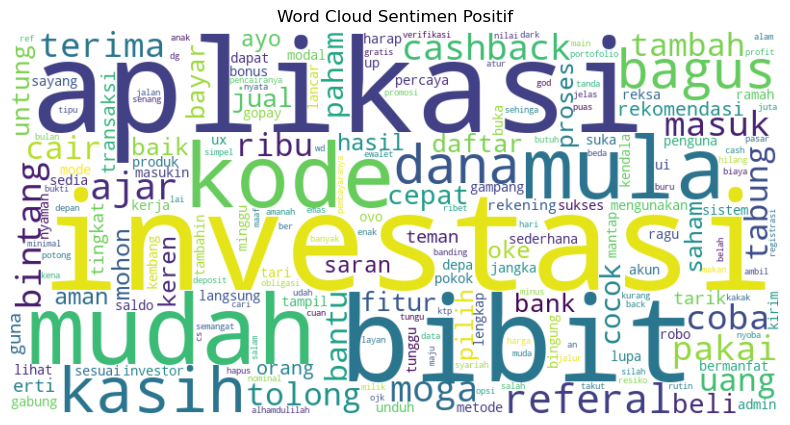

In [14]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['label'] == 2]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

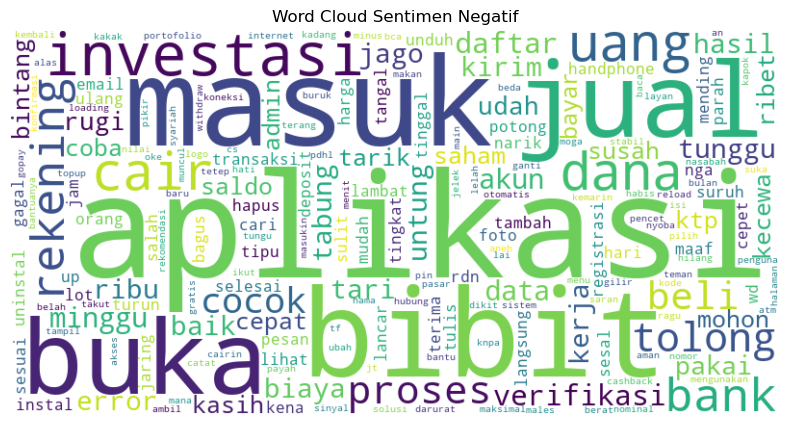

In [15]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['label'] == 1]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif')
plt.show()

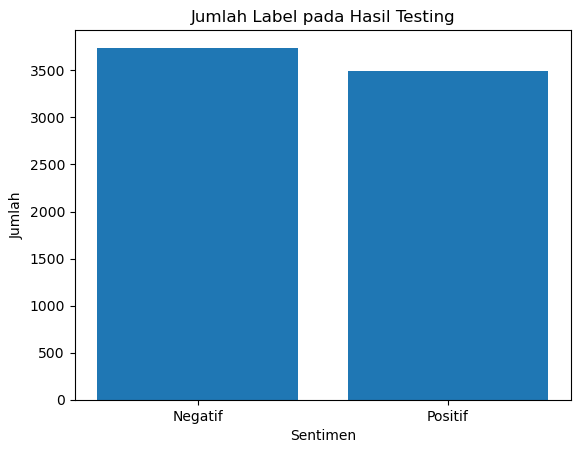

  Sentimen  Jumlah
0  Negatif    3741
1  Positif    3494


In [18]:
# Load the modified testing data
modified_data = pd.read_excel("hasiltesting.xlsx")

# Count the occurrences of each label
label_counts = modified_data["label"].value_counts()

# Extract the label values and their corresponding counts
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()

# Map the label values to their corresponding sentiment
sentiment_map = {2: "Positif", 1: "Negatif"}
labels = [sentiment_map[label] for label in labels]

# Plot the bar chart
plt.bar(labels, counts)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Jumlah Label pada Hasil Testing")
plt.show()

chart_data = pd.DataFrame({"Sentimen": labels, "Jumlah": counts})
print(chart_data)

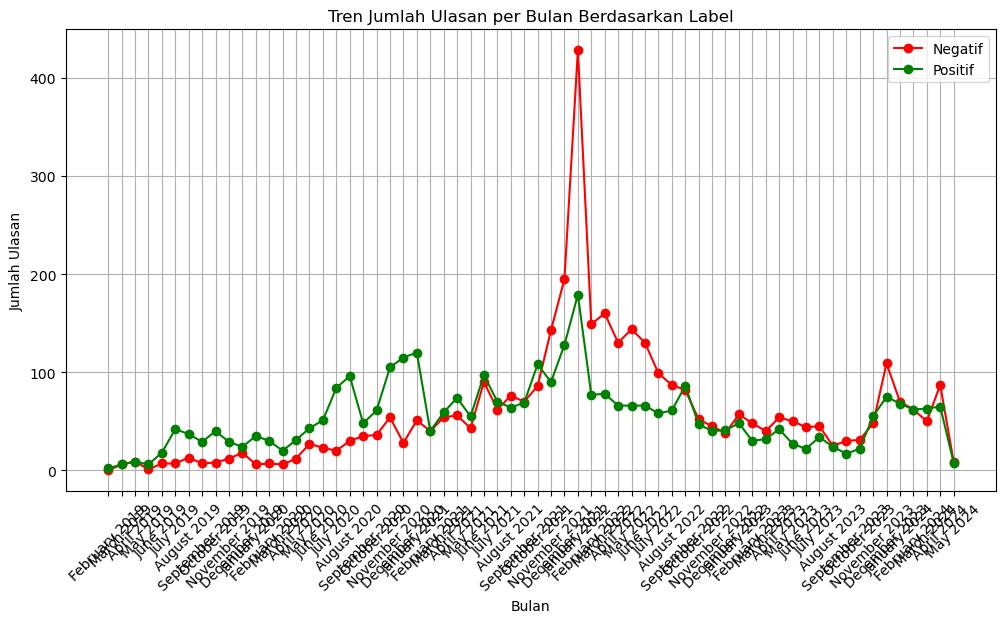

In [17]:
# Memuat data dari Excel file
df = pd.read_excel("hasiltesting.xlsx")

# Mengubah kolom "review_date" menjadi tipe data datetime
df['at'] = pd.to_datetime(df['at'])

# Mengatur kolom "review_date" sebagai indeks dataframe
df.set_index('at', inplace=True)

# Mengganti nilai label menjadi "Positif", "Netral", dan "Negatif"
label_mapping = {2: 'Positif', 1: 'Negatif'}
df['label'] = df['label'].map(label_mapping)

# Menghitung jumlah ulasan per bulan berdasarkan label
monthly_reviews = df.groupby([pd.Grouper(freq='M'), 'label']).size().unstack().fillna(0)

# Membuat line chart untuk tren jumlah ulasan per bulan berdasarkan label
plt.figure(figsize=(12, 6))
labels = ['Negatif', 'Positif']
colors = ['red',  'green']
x_values = range(len(monthly_reviews.index)) 
for i, (label, color) in enumerate(zip(labels, colors)):  # Menambahkan variabel i
    plt.plot(x_values, monthly_reviews[label], marker='o', label=label, color=color)  # Menggunakan x_values

plt.title('Tren Jumlah Ulasan per Bulan Berdasarkan Label')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')

# Mengatur sumbu x dengan rentang bulan dan tahun yang sesuai
plt.xticks(x_values, [d.strftime('%B %Y') for d in monthly_reviews.index], rotation=45)  # Menggunakan x_values dan monthly_reviews.index

plt.legend()
plt.grid(True)
plt.show()